In [1]:
import os
import numpy as np
import pandas as pd
import xarray
import matplotlib.pyplot as plt
import random
plt.rcParams.update({'font.size': 20})

In [2]:
def extract_channel(dataframe, channel):
    return dataframe.loc[dataframe['vertco_reference_1@body'] == channel]
    

In [3]:
def get_obs(df):
    return df["obsvalue@body"].values - df["biascorr_fg@body"].values

In [4]:
def get_allsky(df):
    return df["obsvalue@body"].values - df["fg_depar@body"].values - df["biascorr_fg@body"].values

In [5]:
def get_clearsky(df):
    return df["tbclear@radiance_body"].values

In [6]:
DF_06 = pd.read_table('~/Dendrite/Projects/AWS-325GHz/MWHS/data/output_06_2020.txt', delim_whitespace=True)
#print (DF.shape, type(DF), list(DF))
DF_05 = pd.read_table('~/Dendrite/Projects/AWS-325GHz/MWHS/data/output_05_2020.txt', delim_whitespace=True)
#print (DF.shape, type(DF), list(DF))

DF = DF_06.append(DF_05, ignore_index = True)

In [7]:
DF

,lat@hdr,lon@hdr,zenith@sat,lsm@modsurf,vertco_reference_1@body,obsvalue@body,biascorr_fg@body,tbclear@radiance_body,fg_depar@body,final_obs_error@errstat
0,67.059898,161.912094,45.340000,1.0,1.0,275.440002,-1.685521,275.743744,3.173276,50.0
1,67.059898,161.912094,45.340000,1.0,2.0,232.270004,-3.342128,233.095230,2.471030,2.7
2,67.059898,161.912094,45.340000,1.0,3.0,227.139999,-2.087710,228.170441,1.026415,1.2
3,67.059898,161.912094,45.340000,1.0,4.0,226.479996,-1.606335,227.285767,0.769991,1.0
4,67.059898,161.912094,45.340000,1.0,5.0,228.429993,-2.137400,230.016235,0.664680,1.0
...,...,...,...,...,...,...,...,...,...,...
113571940,0.377200,-143.611893,58.599998,0.0,11.0,246.360001,-1.843230,248.551651,-0.346830,NaN
113571941,0.377200,-143.611893,58.599998,0.0,12.0,255.429993,-1.592877,257.424133,-0.399118,NaN
113571942,0.377200,-143.611893,58.599998,0.0,13.0,265.130005,-0.668159,265.641235,0.158930,NaN
113571943,0.377200,-143.611893,58.599998,0.0,14.0,272.709991,1.669411,271.470856,-0.429197,NaN


In [8]:
df = DF.loc[ (DF['zenith@sat'] <= 7.5)\
            & (DF['lat@hdr']<= 60.0) & (DF['lat@hdr']>= -60.0) ]

In [9]:
channel = 1
df.loc[df['vertco_reference_1@body'] == channel]

,lat@hdr,lon@hdr,zenith@sat,lsm@modsurf,vertco_reference_1@body,obsvalue@body,biascorr_fg@body,tbclear@radiance_body,fg_depar@body,final_obs_error@errstat
645,-43.174500,-127.795097,4.59,0.0,1.0,213.520004,-2.445658,203.861618,3.870162,50.0
1125,-42.384701,-126.848000,3.03,0.0,1.0,209.679993,-2.305825,201.587814,-8.133781,50.0
1140,-42.529099,-127.814697,3.36,0.0,1.0,210.259995,-2.349738,202.167099,-9.319522,50.0
2550,-28.411800,-132.054504,3.34,0.0,1.0,232.630005,-1.654477,229.841995,4.014254,50.0
3000,-27.645100,-131.252197,4.25,0.0,1.0,227.729996,-1.435227,226.367142,-0.845205,50.0
...,...,...,...,...,...,...,...,...,...,...
113570955,3.117400,-152.519501,2.06,0.0,1.0,240.410004,-1.416364,239.818832,0.066399,NaN
113571060,3.075500,-153.261200,4.27,0.0,1.0,239.020004,-1.398393,241.765381,-2.651867,NaN
113571405,2.466500,-152.518997,3.27,0.0,1.0,238.880005,-1.473711,237.887192,1.021252,NaN
113571525,2.424400,-153.259399,3.03,0.0,1.0,237.910004,-1.461862,238.713440,0.282563,NaN


In [10]:
TB_as = []
TB_cs = []
TB_ob = []

channels = np.arange(1, 16, 1)
for channel in channels:
    print (channel)
    TB = extract_channel(df, float(channel))
    TB_as.append(get_allsky(TB))
    TB_cs.append(get_clearsky(TB))
    TB_ob.append(get_obs(TB))

TB_as = np.stack(TB_as)
TB_cs = np.stack(TB_cs)
TB_ob = np.stack(TB_ob)
lsm = TB["lsm@modsurf"].values
lon = TB["lon@hdr"].values
lat = TB["lat@hdr"].values
zen = TB["zenith@sat"].values
TB = np.stack([TB_cs, TB_as])


1
2
3
4
5
6
7
8
9
10
11
12
13
14
15


In [11]:
TB.shape


(2, 15, 370200)

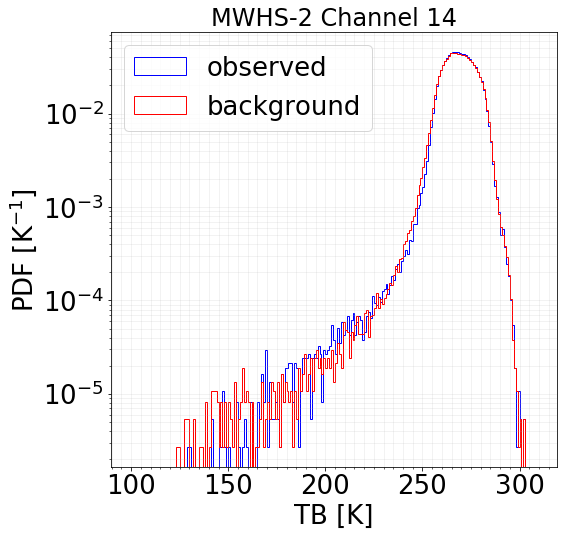

In [22]:
plt.rcParams.update({'font.size': 26})
from matplotlib.ticker import (MultipleLocator, FormatStrFormatter,
                               AutoMinorLocator)
bins = np.arange(100, 310, 1)
for i in range(13, 14):
    fig, ax = plt.subplots(1, 1, figsize = [8, 8])
    #hist = np.histogram(TB_ob[i, :], bins, density = True)
    ax.hist(TB_ob[i, :], bins, label = "observed", color = 'blue',density = True, histtype = "step")
    ax.hist(TB[1, i, :], bins, label = "background", color = 'red', density = True, histtype = "step")
    
#    ax.hist(TB[1, i, :], bins, label = "bac", density = True, histtype= "step")
    ax.xaxis.set_minor_locator(MultipleLocator(5))
    ax.yaxis.set_minor_locator(MultipleLocator(2))
    ax.grid(which = 'both', alpha = 0.2)
    ax.set_yscale('log')
    ax.legend( loc = "upper left")
    ax.set_xlabel('TB [K]')
    ax.set_ylabel(r'PDF [K$^{-1}$]')
    ax.set_title('MWHS-2 Channel ' + str(i+1), fontsize = 24)

    fig.savefig('PDF' + str(i) + '.pdf', bbox_inches = "tight")

In [13]:
cases = np.arange(0, TB.shape[2], 1)
sky = ['clearsky', 'allsky']
channel_id = np.arange(1, 16, 1)
TB_MWHS = xarray.DataArray(TB, coords = [sky, channel_id, cases], dims = ['sky','channel', 'cases'], name = 'TB')
TB_MWHS.attrs['LSM'] = lsm
TB_MWHS.attrs['lon'] = lon
TB_MWHS.attrs['lat'] = lat
TB_MWHS.to_netcdf('TB_MWHS.nc')

In [14]:
def TB_test_train(TB, randomList):
    TB_test = TB[:, :, randomList]
    TB_test.attrs['LSM'] = lsm[randomList]
    TB_test.attrs['lon'] = lon[randomList]
    TB_test.attrs['lat'] = lat[randomList]
    return TB_test

In [15]:
randomList = random.sample(range(0, len(cases)), len(cases))
lim = int(len(cases) * 0.32)

TB_MWHS_test = TB_test_train(TB_MWHS, randomList[:lim])
TB_MWHS_test.to_netcdf('TB_MWHS_test.nc', 'w')

TB_MWHS_train = TB_test_train(TB_MWHS, randomList[lim:])
TB_MWHS_train.to_netcdf('TB_MWHS_train.nc', 'w')
#TB_MWHS[:, :, randomList[lim:]].to_netcdf('TB_MWHS_train.nc', 'w')
#TB_MWHS[:, :, randomList[:lim]].to_netcdf('TB_MWHS_test.nc', 'w')

In [16]:
len(cases)-lim

251736

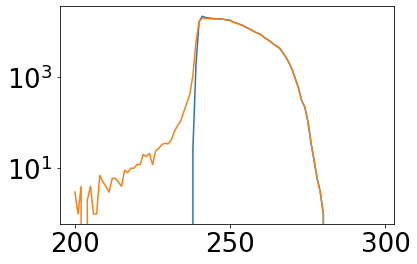

In [17]:

bins1 = np.arange(200, 300, 1)
fig, ax = plt.subplots(1, 1)
hist = np.histogram(TB[0, 10, :],bins1 )
ax.plot(bins1[:-1], hist[0])
ax.set_yscale('log')

hist = np.histogram(TB[1, 10, :],bins1 )
ax.plot(bins1[:-1], hist[0])

## testing data

In [18]:
TB_183 = extract_channel(DF, channel )
TB_as = get_allsky(TB_183)
TB_cs = get_clearsky(TB_183)

TB_183

,lat@hdr,lon@hdr,zenith@sat,lsm@modsurf,vertco_reference_1@body,obsvalue@body,biascorr_fg@body,tbclear@radiance_body,fg_depar@body,final_obs_error@errstat
14,67.059898,161.912094,45.340000,1.000000,15.0,260.739990,-0.993339,262.156250,1.117775,2.358525
29,66.952400,159.941406,41.259998,1.000000,15.0,260.149994,-1.169579,261.659180,0.842634,2.444172
44,66.240700,151.871796,19.290001,0.992693,15.0,263.489990,-1.798172,267.107788,8.687838,2.208688
59,65.579903,146.997299,1.830000,0.999438,15.0,264.350006,-1.972587,265.270966,5.342336,2.200000
74,64.131699,139.377899,27.059999,0.999972,15.0,259.170013,-1.901201,266.210968,-0.922650,5.977366
...,...,...,...,...,...,...,...,...,...,...
113571884,2.396100,-156.095901,25.549999,0.000000,15.0,276.320007,-1.624728,278.161285,-0.204142,NaN
113571899,1.816500,-152.516800,4.510000,0.000000,15.0,279.600006,-1.930648,281.031189,0.504441,NaN
113571914,1.723100,-151.944504,9.480000,0.000000,15.0,279.149994,-1.922332,281.110260,-0.033140,NaN
113571929,1.041100,-147.749603,40.110001,0.000000,15.0,278.880005,-1.760017,280.406281,0.233736,NaN


In [19]:
channel = 11
TB_183 = extract_channel(df, channel )
TB_as = get_allsky(TB_183)
TB_cs = get_clearsky(TB_183)



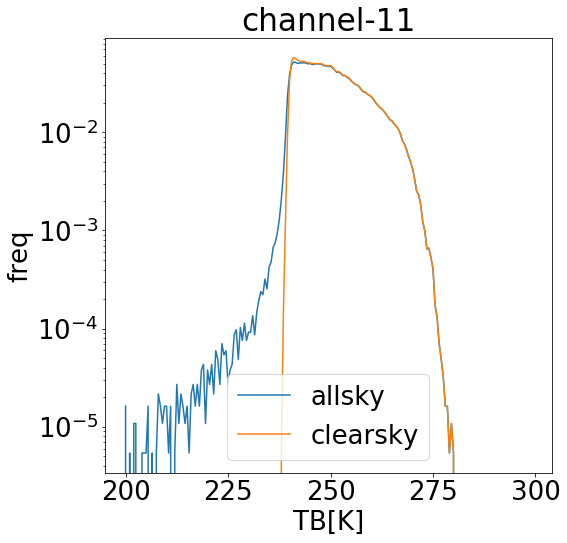

In [20]:
bins = np.arange(200, 300, 0.5)
hist = np.histogram(TB_as,bins, density = True)
fig, ax = plt.subplots(1, 1, figsize = [8, 8])
ax.plot(bins[:-1], hist[0])

hist = np.histogram(TB_cs, bins, density = True)
ax.plot(bins[:-1], hist[0])
ax.set_yscale('log')
ax.set_ylabel('freq')
ax.set_xlabel('TB[K]')
ax.set_title('channel-%s'%str(channel))
ax.legend(['allsky', 'clearsky'])
fig.savefig('TB.png', bbox_inches = 'tight')

In [21]:
TB_MWHS_test.shape

(2, 15, 118464)